Lane Detection \
Prova sfruttando il colore marrone

In [1]:
import cv2
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import math

Load video

In [2]:
# Define the relative path to the video file
notebook_dir = Path().resolve()
project_root = notebook_dir.parent.parent
video_path = project_root / "data" / "recording_2" / "Recording_2.mp4"
video_path = str(video_path)

# Load the video
cap = cv2.VideoCapture(video_path)

# Check
print(f"Opened: {cap.isOpened()}, FPS: {cap.get(cv2.CAP_PROP_FPS)}, Total Frames: {cap.get(cv2.CAP_PROP_FRAME_COUNT)}")

Opened: True, FPS: 59.94005994005994, Total Frames: 276.0


Get frame

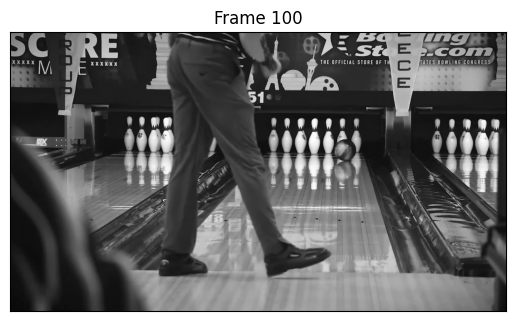

In [ ]:
# Set frame position
cap.set(cv2.CAP_PROP_POS_FRAMES, 180)
ret, image_color = cap.read()
if not ret:
    print("Failed to read the frame")
    cap.release()
    exit()

# grayscale
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Show the image
plt.imshow(image, cmap='gray')
plt.title('Frame 100')
plt.xticks([]), plt.yticks([])
plt.show()


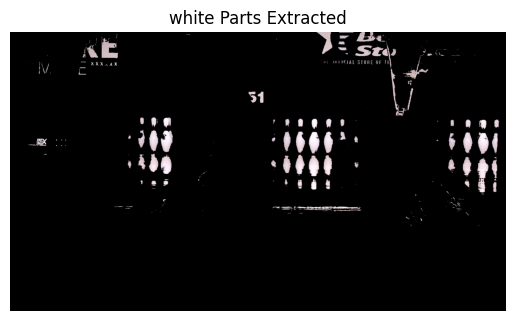

In [ ]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)

# Define the range for light brown color in HSV
lower_brown = np.array([00, 30, 100])
upper_brown = np.array([20, 200, 255])

# Define the range for rose color in HSV
lower_rose = np.array([150, 30, 200])
upper_rose = np.array([180, 200, 255])

# Define the range for white color in HSV
lower_white = np.array([0, 0, 200])
upper_white = np.array([180, 30, 255])

'''
Explain the parameters of HSV color space
H: Hue (color) - 0 to 180 degrees (Red to Violet) --- 0 è rosso, 60 è giallo, 120 è verde, 180 è viola --- marrone: 0-30, rosa: 150-180
S: Saturation (intensity of the color) - 0 to 255 (gray to pure color) --- più basso è, più grigio è, più alto è, più colorato è
V: Value (brightness of the color) - 0 to 255 (black to white)  --- più basso è, più scuro è, più alto è, più chiaro è
'''

# Create a mask for light brown color
mask = cv2.inRange(hsv_image, lower_white, upper_white)

# Apply the mask to the original image
white_extracted = cv2.bitwise_and(image_color, image_color, mask=mask)

# Display the result
plt.imshow(cv2.cvtColor(white_extracted, cv2.COLOR_BGR2RGB))
plt.title('white Parts Extracted')
plt.axis('off')
plt.show()
        


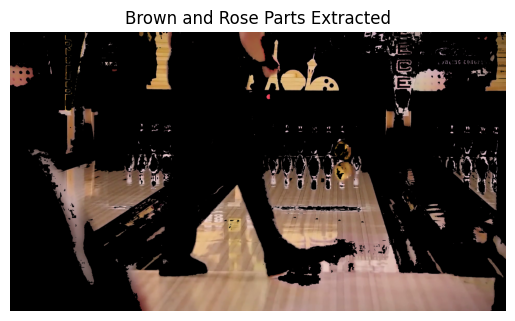

In [5]:
# Create masks for brown and rose colors
mask_brown = cv2.inRange(hsv_image, lower_brown, upper_brown)
mask_rose = cv2.inRange(hsv_image, lower_rose, upper_rose)

# Combine the masks
combined_mask = cv2.bitwise_or(mask_brown, mask_rose)

# Apply the combined mask to the original image
extracted_image = cv2.bitwise_and(image_color, image_color, mask=combined_mask)

# Display the result
plt.imshow(cv2.cvtColor(extracted_image, cv2.COLOR_BGR2RGB))
plt.title('Brown and Rose Parts Extracted')
plt.axis('off')
plt.show()

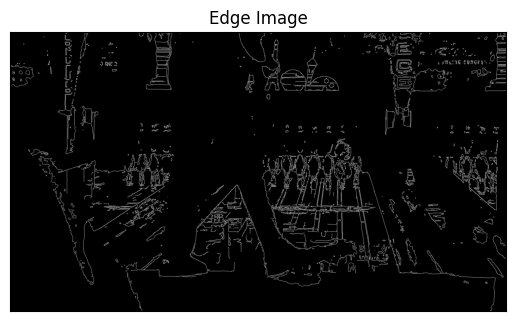

In [6]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2GRAY)

# Compute Otsu's threshold 
otsu_thresh, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Set lower and upper thresholds relative to Otsu's threshold
lower = 0.5 * otsu_thresh
upper = 1.5 * otsu_thresh

edges = cv2.Canny(gray_image, lower, upper)


# Display the original image and the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.show()

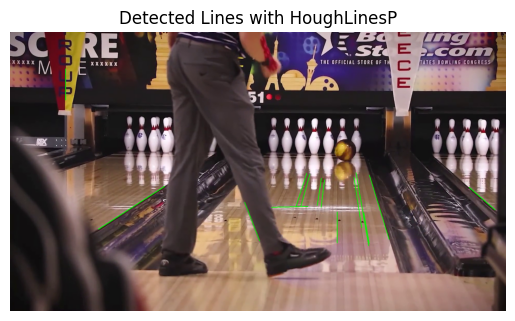

[[[ 342  763  598  597]]

 [[1012  678 1153  675]]

 [[1339  544 1388  827]]

 [[1266  816 1266  696]]

 [[1331  562 1361  757]]

 [[1391  554 1467  802]]

 [[1126  672 1160  551]]

 [[1106  677 1148  547]]

 [[1369  699 1390  818]]

 [[ 215  263  215  142]]

 [[1204  678 1217  572]]

 [[ 908  659  966  808]]

 [[1189  671 1205  566]]

 [[1777  601 1877  688]]]
14


In [7]:
# Apply Probabilistic Hough Line Transform
min_line_length = 100
max_line_gap = 10 
lines_p = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=min_line_length, maxLineGap=max_line_gap) 
'''
HoughLinesP parameters: image, rho, theta, threshold, lines, minLineLength, maxLineGap
image: 8-bit, single-channel binary source image. The image may be modified by the function.
rho: Distance resolution of the accumulator in pixels.
theta: Angle resolution of the accumulator in radians.
threshold: Accumulator threshold parameter. Only those lines are returned that get enough votes ( > threshold ).
----- lines: Output vector of lines. Each line is represented by a 4-element vector (x1, y1, x2, y2).
minLineLength: Minimum line length. Line segments shorter than that are rejected.
maxLineGap: Maximum allowed gap between points on the same line to link them.'
'''

# Create a copy of the original image to draw lines on
line_image_p = np.copy(image_color)

# Draw the lines on the image
if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image_p, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(line_image_p, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines with HoughLinesP')
plt.axis('off')
plt.show()

print(lines_p)
print(len(lines_p))

In [8]:
# # Apply Hough Line Transform
# lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# # Create a copy of the original image to draw lines on
# line_image = np.copy(image_color)

# # Draw the lines on the image
# if lines is not None:
#     for rho, theta in lines[:, 0]:
#         a = np.cos(theta)
#         b = np.sin(theta)
#         x0 = a * rho
#         y0 = b * rho
#         x1 = int(x0 + 1000 * (-b))
#         y1 = int(y0 + 1000 * (a))
#         x2 = int(x0 - 1000 * (-b))
#         y2 = int(y0 - 1000 * (a))
#         cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# # Display the result
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
# plt.title('Detected Lines')
# plt.axis('off')
# plt.show()

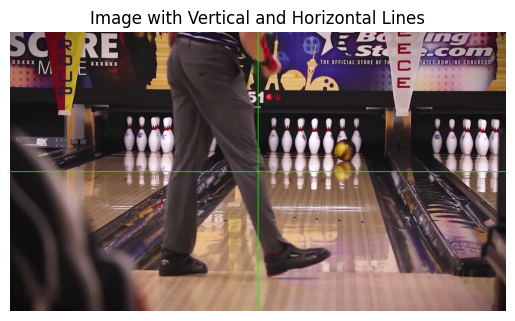

In [9]:
# Get the dimensions of the image
height, width, _ = image_color.shape

# Calculate the center points
center_x = width // 2
center_y = height // 2

# Create a copy of the original image to draw lines on
image_with_lines = np.copy(image_color)

# Draw the vertical line
cv2.line(image_with_lines, (center_x, 0), (center_x, height), (0, 255, 0), 2)

# Draw the horizontal line
cv2.line(image_with_lines, (0, center_y), (width, center_y), (0, 255, 0), 2)

# Display the result
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Image with Vertical and Horizontal Lines')
plt.axis('off')
plt.show()